# Chapitre 7 : Visualisation des données financières
Apprenez à créer des graphiques et des visualisations financières professionnels à l’aide de matplotlib et seaborn. Maîtrisez l’art de communiquer des informations financières grâce à une visualisation efficace des données.

## Objectifs d’apprentissage :
- Maître matplotlib pour les graphiques financiers

- Créez des visualisations avancées avec seaborn
    
- Créez des tableaux de bord financiers interactifs

- Apprenez les meilleures pratiques en matière de visualisation financière

1. Graphiques financiers de base avec Matplotlib

Création de graphiques financiers fondamentaux à l'aide de matplotlib.

C:\Users\wilfr\AppData\Local\Temp\ipykernel_4564\2278175348.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl = yf.download(ticker, start='2023-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed

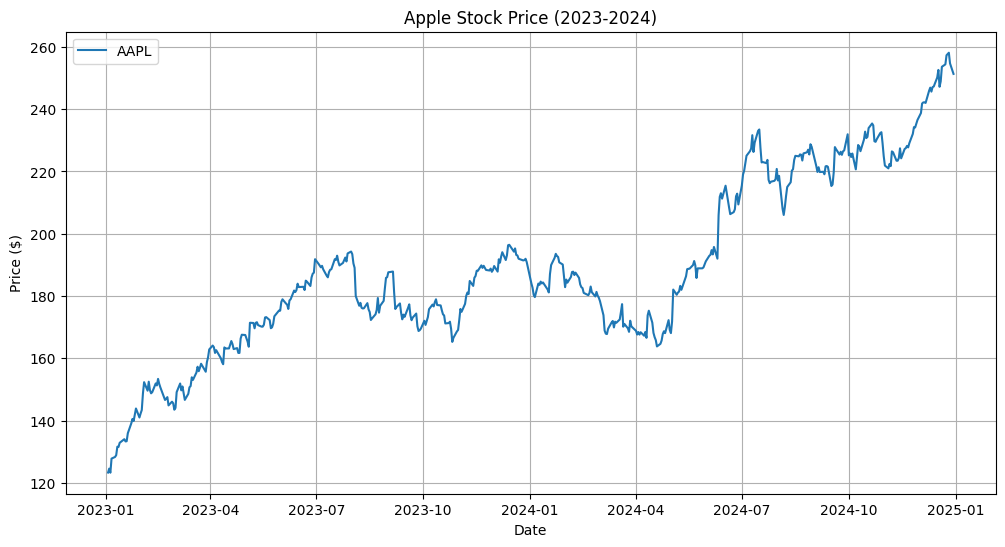

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


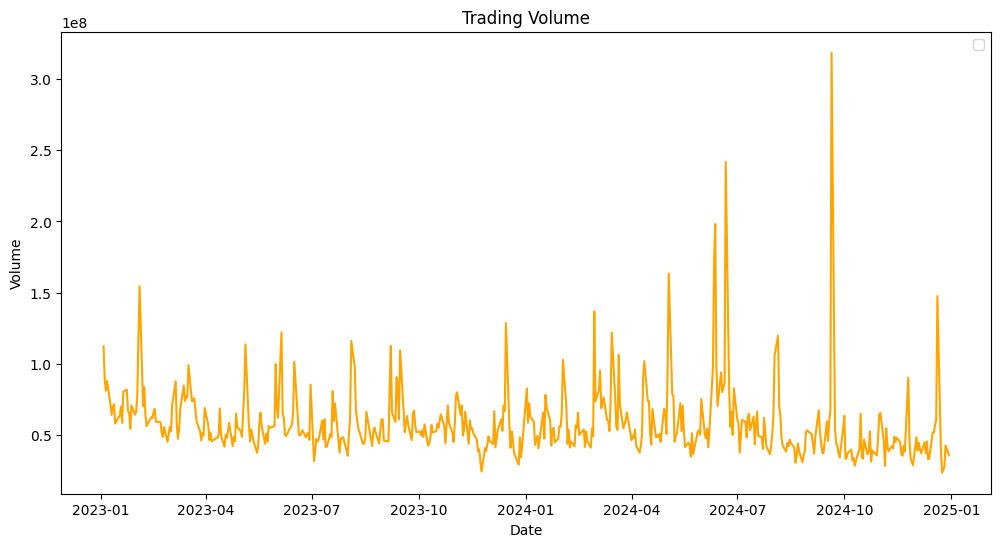

In [33]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# Download stock data
ticker='AAPL'
aapl = yf.download(ticker, start='2023-01-01', end='2024-12-31')

#aapl=pd.DataFrame(aapl)
#print(aapl.head())

if 'Adj Close' in aapl.columns:
    aapl['Adj Close']=aapl['Adj Close']
else:
    aapl['Adj Close']=aapl['Close']


# Create a price chart
plt.figure(figsize=(12, 6))
plt.plot(aapl.index, aapl['Adj Close'], label='AAPL')
plt.title('Apple Stock Price (2023-2024)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Create volume bars
plt.figure(figsize=(12, 6))
plt.plot(aapl.index, aapl['Volume'], color='orange')
plt.title('Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

2. Graphiques avancés avec Seaborn
Création de visualisations statistiques pour l'analyse financière.

Date
2023-01-03         NaN
2023-01-04    0.010314
2023-01-05   -0.010605
2023-01-06    0.036794
2023-01-09    0.004089
Name: Adj Close, dtype: float64


c:\Users\wilfr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


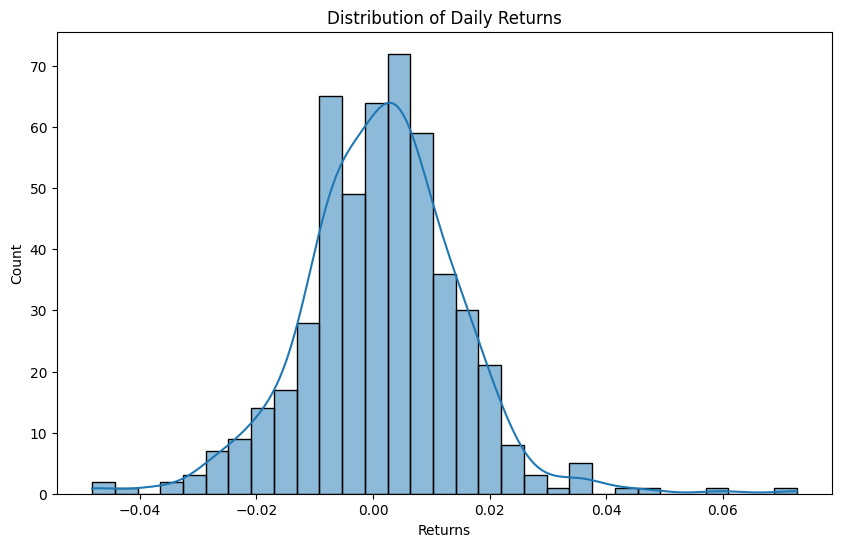

C:\Users\wilfr\AppData\Local\Temp\ipykernel_4564\2236376043.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  portfolio = yf.download(['AAPL', 'MSFT', 'GOOGL'],
[*********************100%***********************]  3 of 3 completed


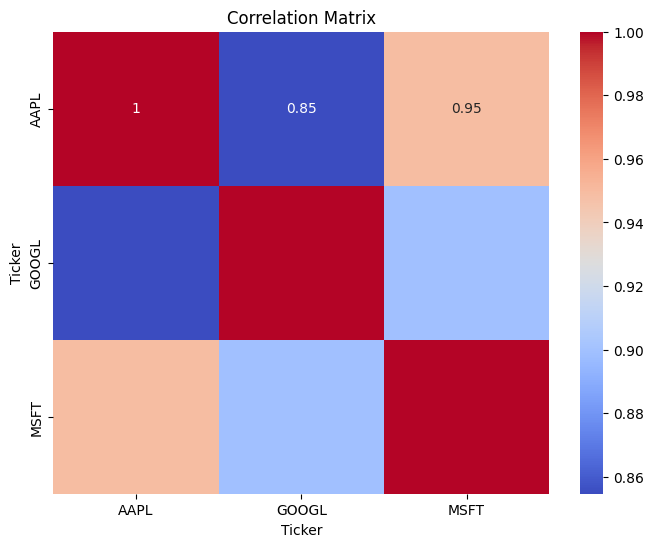

In [40]:
import seaborn as sns

# Calculate daily returns
returns = aapl['Adj Close'].pct_change()
print(returns.head())

# Create a distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(returns.dropna(), kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Returns')
plt.show()

# Create a correlation heatmap
portfolio = yf.download(['AAPL', 'MSFT', 'GOOGL'], 
                       start='2023-01-01', 
                       end='2023-12-31')['Close']
corr = portfolio.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

3. Graphiques d'analyse technique
Création de visualisations d'analyses techniques.

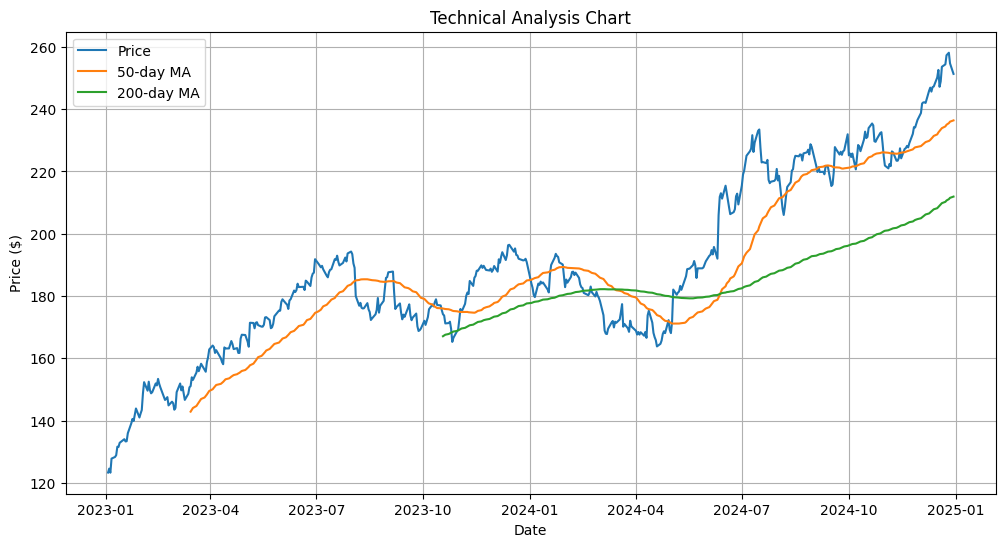

In [41]:
# Calculate moving averages ( Calculer les moyennes mobiles)
aapl['MA50'] = aapl['Close'].rolling(window=50).mean()
aapl['MA200'] = aapl['Close'].rolling(window=200).mean()

# Create technical analysis chart
plt.figure(figsize=(12, 6))
plt.plot(aapl.index, aapl['Close'], label='Price')
plt.plot(aapl.index, aapl['MA50'], label='50-day MA')
plt.plot(aapl.index, aapl['MA200'], label='200-day MA')
plt.title('Technical Analysis Chart')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

 Interpretation:
 - Si la moyenne mobile d'une période courte est au dessus de la grande période: Alors il faut effectuer un achat de l'action
 - Si c'est le contraire: Alors il faut effectuer une vente tout simplement des actions.
 - NB: Si vous vous trouvez sur un marché non tendantiel alors la MM n'a pas d'éffet.
 Exemple: Dans notre Cas, l'achat des actions de Apple est recommendable de 01.01.2023 au 01.03.2024 et souhaitable de les revendre entre 02.03.2024 au 01.06.2024 et racheter ensuite a partir du 02.06.2024

# Exercice

1. Créer un tableau de bord complet d'analyse boursière :
- Graphique des cours avec moyennes mobiles
- Analyse des volumes
- Répartition des rendements
- Indicateurs techniques
2. Créer un outil de visualisation de portefeuille :
- Camembert de répartition des actifs
- Comparaison des performances
- Nuage de points risque-rendement
- Carte thermique de corrélation
3. Mettre en place des graphiques en chandeliers :
- Figures en chandeliers OHLC
- Superposition des volumes
- Niveaux de support/résistance
4. Facultatif : créer des visualisations d'analyse de marché :
- Comparaison des performances sectorielles
- Indicateurs de l'étendue du marché
- Corrélations entre indices
5. développer des graphiques d'analyse des risques :
- Visualisation de la valeur à risque (VaR)
- Tableau de bord des mesures de risque
- Analyse de la volatilité
6. Facultatif : créer un tableau de bord d'analyse des options :
- Visualisation de la chaîne d'options
- Surface de volatilité implicite
- Graphiques d'analyse des grecs.

# 1-Tableau de bord boursier simple (débutant)
Ce notebook télécharge des données historiques pour AAPL, MSFT, GOOG, AMZN et crée :
- Graphique des cours avec moyennes mobiles
- Analyse des volumes
- Répartition des rendements
- Indicateurs techniques (SMA, EMA, RSI, MACD)
- Visualisation portefeuille (camembert, comparaison normalisée, risque-rendement, heatmap corrélation)
- Chandeliers OHLC (avec volumes et niveaux support/résistance)
- VaR historique et mesures de volatilité

**Remarque** : ce notebook est conçu pour apprendre — il privilégie la clarté plutôt que la performance.


In [43]:
# %%  # cellule 1 : imports et installation si besoin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.dates import date2num
import datetime as dt

# pour télécharger les données
import yfinance as yf

# pour les chandeliers (optionnel ; plus pro)
try:
    import mplfinance as mpf
    HAS_MPLFINANCE = True
except Exception:
    HAS_MPLFINANCE = False

plt.style.use('seaborn-v0_8-darkgrid')  # rendu agréable (facultatif)


In [44]:
# %%  # cellule 2 : paramètres et récupération des données
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN']         # actions choisies
period = '2y'                                      # horizon (2 années)
interval = '1d'                                    # données journalières

# Télécharger les prix (Open, High, Low, Close, Volume)
raw = yf.download(tickers, period=period, interval=interval, group_by='ticker', auto_adjust=True, progress=False)

# Organiser un DataFrame "Close" et "Volume" simple (multi-col -> DataFrame)
closes = pd.DataFrame({t: raw[t]['Close'] for t in tickers})
volumes = pd.DataFrame({t: raw[t]['Volume'] for t in tickers})

# Afficher un aperçu
closes.head()


,AAPL,MSFT,GOOG,AMZN
Date,,,,
2023-09-27,168.776840,308.146271,130.566513,125.980003
2023-09-28,169.034317,308.983612,132.225174,125.980003
2023-09-29,169.549271,311.062317,130.953873,127.120003
2023-10-02,172.064651,317.022491,134.251266,129.460007
2023-10-03,170.727722,308.737396,132.393982,124.720001


Indicateurs techniques
Nous implémentons des fonctions simples : SMA, EMA, RSI, MACD.

In [45]:
# %%  # cellule 3 : indicateurs
def SMA(series, window):
    return series.rolling(window=window).mean()

def EMA(series, span):
    return series.ewm(span=span, adjust=False).mean()

def RSI(series, window=14):
    delta = series.diff()
    up = delta.clip(lower=0)
    down = -delta.clip(upper=0)
    roll_up = up.ewm(alpha=1/window, adjust=False).mean()
    roll_down = down.ewm(alpha=1/window, adjust=False).mean()
    rs = roll_up / roll_down
    rsi = 100 - 100/(1+rs)
    return rsi

def MACD(series, short=12, long=26, signal=9):
    ema_short = EMA(series, short)
    ema_long = EMA(series, long)
    macd = ema_short - ema_long
    macd_signal = EMA(macd, signal)
    hist = macd - macd_signal
    return macd, macd_signal, hist


## A.) Graphique des cours avec moyennes mobiles + volumes
On prend AAPL comme exemple.

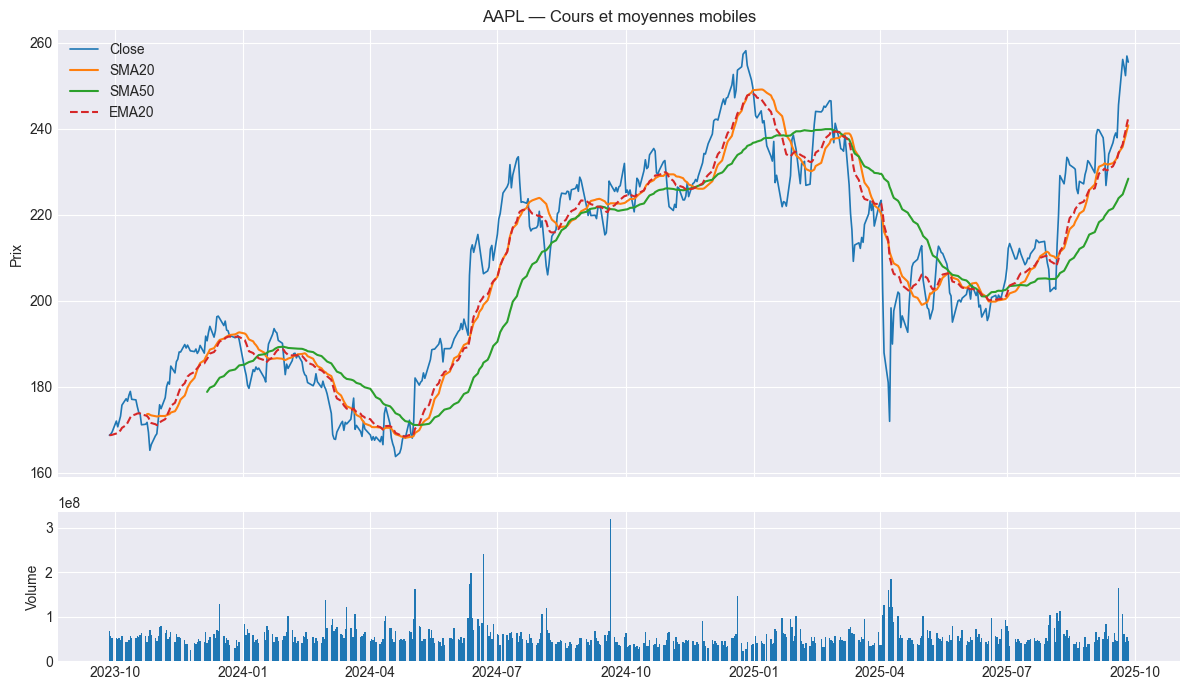

In [46]:
# %%  # cellule 4 : plot prix + SMA/EMA + volume pour AAPL
ticker = 'AAPL'
close = closes[ticker].dropna()
vol = volumes[ticker].reindex(close.index)  # aligner index

sma20 = SMA(close, 20)
sma50 = SMA(close, 50)
ema20 = EMA(close, 20)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,7), gridspec_kw={'height_ratios':[3,1]}, sharex=True)
ax1.plot(close.index, close, label='Close', linewidth=1.2)
ax1.plot(sma20.index, sma20, label='SMA20')
ax1.plot(sma50.index, sma50, label='SMA50')
ax1.plot(ema20.index, ema20, label='EMA20', linestyle='--')
ax1.set_title(f'{ticker} — Cours et moyennes mobiles')
ax1.set_ylabel('Prix')
ax1.legend()

ax2.bar(vol.index, vol.values, width=1)
ax2.set_ylabel('Volume')
plt.tight_layout()
plt.show()


## B.) Répartition des rendements et indicateurs (RSI, MACD)

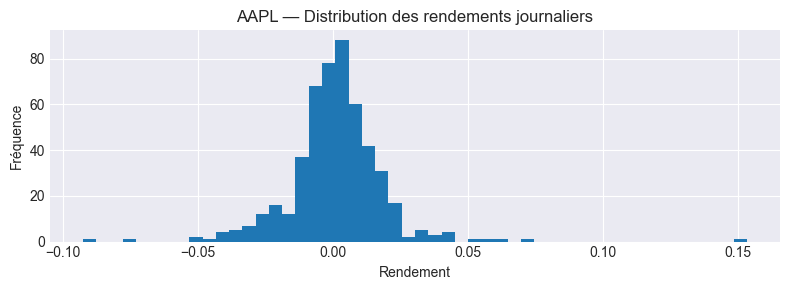

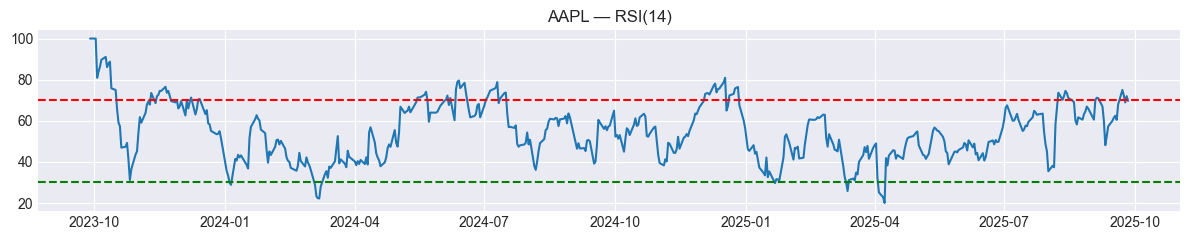

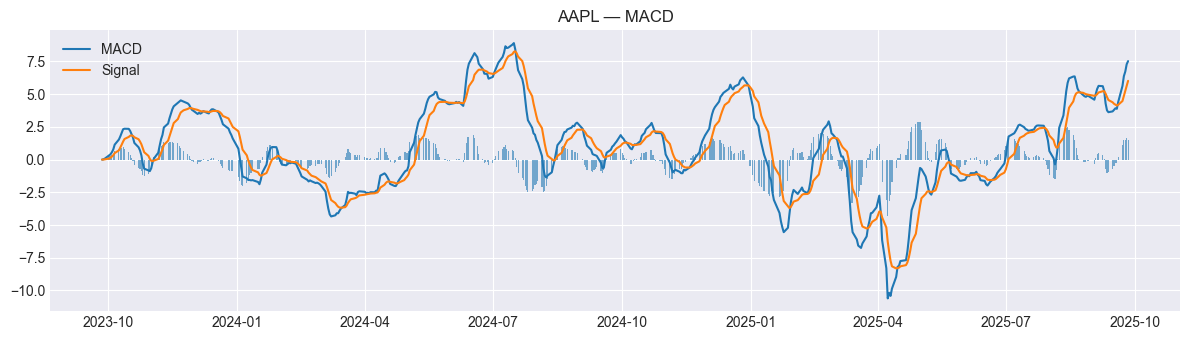

In [47]:
# %%  # cellule 5 : rendement, histogramme, RSI, MACD (AAPL)
returns = close.pct_change().dropna()

# Distribution des rendements
plt.figure(figsize=(8,3))
plt.hist(returns, bins=50)
plt.title(f'{ticker} — Distribution des rendements journaliers')
plt.xlabel('Rendement')
plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()

# RSI
rsi14 = RSI(close)
plt.figure(figsize=(12,2.5))
plt.plot(rsi14.index, rsi14)
plt.axhline(70, linestyle='--', color='red'); plt.axhline(30, linestyle='--', color='green')
plt.title(f'{ticker} — RSI(14)')
plt.tight_layout(); plt.show()

# MACD
macd, macd_signal, macd_hist = MACD(close)
plt.figure(figsize=(12,3.5))
plt.plot(macd.index, macd, label='MACD')
plt.plot(macd_signal.index, macd_signal, label='Signal')
plt.bar(macd_hist.index, macd_hist, alpha=0.6)
plt.legend(); plt.title(f'{ticker} — MACD'); plt.tight_layout(); plt.show()


## 2) Outil de visualisation de portefeuille
- Camembert de répartition (poids exemples)
- Comparaison des performances (prix normalisés)
- Nuage risque-rendement (annualisé)
- Carte thermique de corrélation

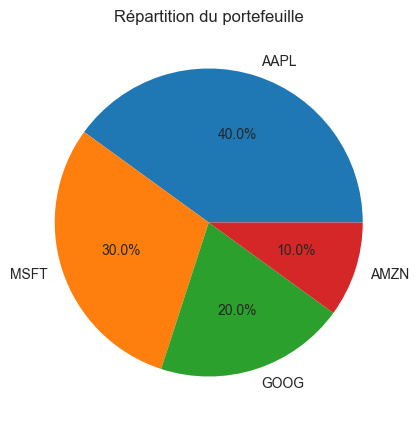

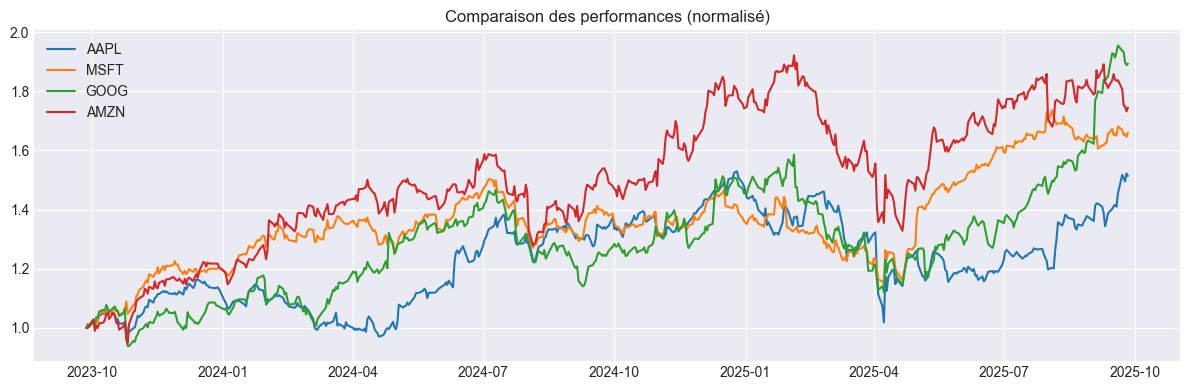

C:\Users\wilfr\AppData\Local\Temp\ipykernel_4564\3318339409.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(vol_ann[i], mean_ann[i], t)


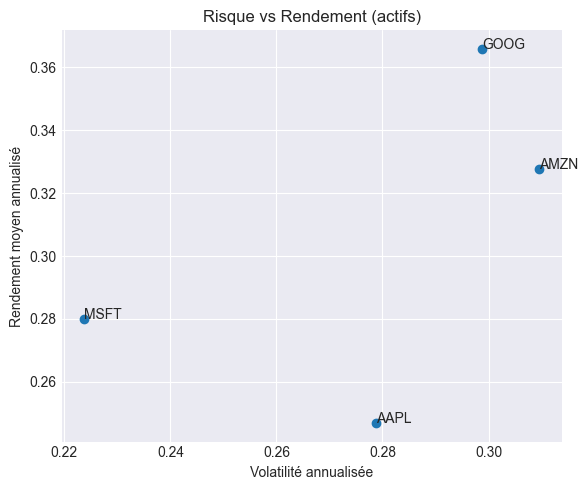

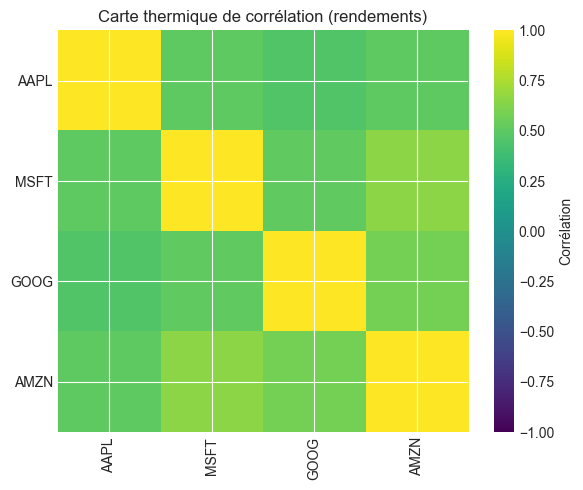

In [48]:
# %%  # cellule 6 : portefeuille et visualisations
# Exemple de poids
weights = {'AAPL': 0.4, 'MSFT': 0.3, 'GOOG': 0.2, 'AMZN': 0.1}

# Camembert
labels = list(weights.keys())
sizes = list(weights.values())
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Répartition du portefeuille')
plt.show()

# Comparaison normalisée (start = 1)
normalized = closes / closes.iloc[0]
plt.figure(figsize=(12,4))
for col in normalized.columns:
    plt.plot(normalized.index, normalized[col], label=col)
plt.legend(); plt.title('Comparaison des performances (normalisé)')
plt.tight_layout(); plt.show()

# Risque-rendement (par actif)
rets = closes.pct_change().dropna()
mean_ann = rets.mean() * 252
vol_ann = rets.std() * np.sqrt(252)

plt.figure(figsize=(6,5))
plt.scatter(vol_ann, mean_ann)
for i, t in enumerate(mean_ann.index):
    plt.text(vol_ann[i], mean_ann[i], t)
plt.xlabel('Volatilité annualisée')
plt.ylabel('Rendement moyen annualisé')
plt.title('Risque vs Rendement (actifs)')
plt.tight_layout(); plt.show()

# Corrélation (heatmap simple)
corr = rets.corr()
plt.figure(figsize=(6,5))
plt.imshow(corr, aspect='auto', cmap='viridis', vmin=-1, vmax=1)
plt.colorbar(label='Corrélation')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Carte thermique de corrélation (rendements)')
plt.tight_layout(); plt.show()


## 3) Chandeliers OHLC + volumes + niveaux support/résistance
On utilise `mplfinance` si disponible, sinon un tracé simple.

In [ ]:
#1️Imports et vérification de mplfinance
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from matplotlib.patches import Rectangle

try:
    import mplfinance as mpf
    HAS_MPLFINANCE = True
except ImportError:
    HAS_MPLFINANCE = False


In [ ]:
# Paramètres du ticker
ticker = 'AAPL'
period = '6mo'
interval = '1d'


In [ ]:
# Téléchargement des données OHLC
ohlc = yf.download(ticker, period=period, interval=interval, auto_adjust=True, progress=False)

In [ ]:
# Nettoyage des données
ohlc = ohlc[['Open','High','Low','Close','Volume']].dropna()
ohlc = ohlc.astype({'Open':'float','High':'float','Low':'float','Close':'float','Volume':'float'})
if ohlc.index.tz is not None:
    ohlc.index = ohlc.index.tz_localize(None)


In [70]:
# Aplatir les colonnes si elles sont multi-index
if isinstance(ohlc.columns, pd.MultiIndex):
    ohlc.columns = ohlc.columns.get_level_values(0)  # prendre le premier niveau, par ex. 'Open','High', etc.


In [71]:
print(ohlc.head())
print(ohlc.columns)


Price             Open        High         Low       Close    Volume
Date                                                                
2025-03-27  220.849421  224.440637  220.021446  223.303421  37094800
2025-03-28  221.128734  223.263508  217.148471  217.367935  39818600
2025-03-31  216.480107  225.069084  215.702013  221.587616  65299300
2025-04-01  219.273283  223.133829  218.365501  222.645035  36412700
2025-04-02  220.779606  224.640152  220.480335  223.343323  35905900
Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object', name='Price')


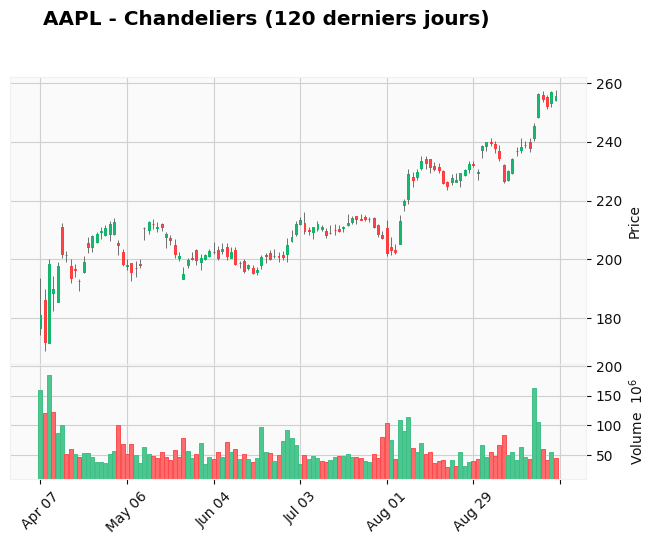

Exemples niveaux résistance (approx.): [257.3399963378906, 257.6000061035156]
Exemples niveaux support (approx.): [168.79682446290911]


In [74]:
# Tracé avec mplfinance
if HAS_MPLFINANCE:
    mpf.plot(
        ohlc.tail(120),
        type='candle',
        volume=True,
        title=f'{ticker} - Chandeliers (120 derniers jours)',
        style='yahoo'
    )
else:
    def simple_candlestick(ax, df):
        dates = [date2num(d) for d in df.index]
        width = 0.6
        for i, d in enumerate(dates):
            o, h, l, c = df['Open'].iloc[i], df['High'].iloc[i], df['Low'].iloc[i], df['Close'].iloc[i]
            bottom = min(o, c)
            height = abs(o - c)
            facecolor = 'green' if c >= o else 'red'
            rect = Rectangle((d - width/2, bottom), width, height, facecolor=facecolor, edgecolor='black')
            ax.add_patch(rect)
            ax.plot([d, d], [l, h], color='black', linewidth=0.6)
        ax.set_xlim(dates[0]-1, dates[-1]+1)
        ax.xaxis_date()
        ax.figure.autofmt_xdate()

    sub = ohlc.tail(120)
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,7), gridspec_kw={'height_ratios':[3,1]}, sharex=True)
    simple_candlestick(ax1, sub)
    ax1.set_title(f'{ticker} - Chandeliers (120 derniers jours)')
    ax2.bar(sub.index, sub['Volume'], color='blue', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Niveaux support / résistance simples (min/max glissant)
window = 20
highs = ohlc['High'].rolling(window).max().dropna()
lows = ohlc['Low'].rolling(window).min().dropna()

res_levels = sorted(highs.nlargest(3).unique())
sup_levels = sorted(lows.nsmallest(3).unique())

print("Exemples niveaux résistance (approx.):", res_levels)
print("Exemples niveaux support (approx.):", sup_levels)


## 4️.) Visualisations d’analyse de marché
a) Comparaison des performances sectorielles

Pour AAPL, on peut comparer sa performance avec le secteur technologie ou l’indice S&P 500 (SPY).

C:\Users\wilfr\AppData\Local\Temp\ipykernel_4564\568338244.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period='6mo')['Close']
[*********************100%***********************]  4 of 4 completed


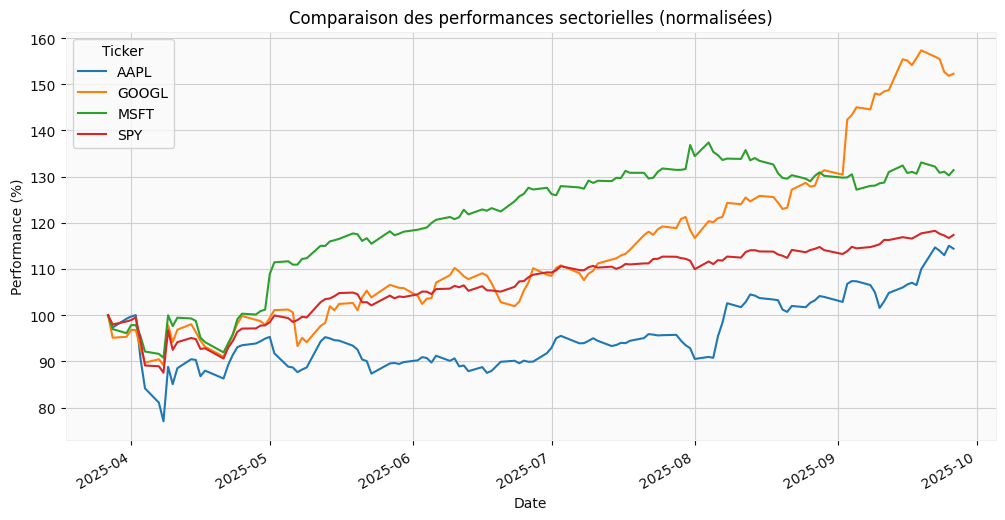

In [75]:
import yfinance as yf
import matplotlib.pyplot as plt

# Télécharger les cours
tickers = ['AAPL', 'MSFT', 'GOOGL', 'SPY']  # exemple secteur techno + S&P 500
data = yf.download(tickers, period='6mo')['Close']

# Normaliser pour comparaison
data_norm = data / data.iloc[0] * 100

# Tracé
data_norm.plot(figsize=(12,6))
plt.title("Comparaison des performances sectorielles (normalisées)")
plt.ylabel("Performance (%)")
plt.xlabel("Date")
plt.grid(True)
plt.show()


b) Indicateurs de l’étendue du marché

Exemples : High-Low Spread, taux de hausse/baisse.

In [89]:
ohlc = yf.download('AAPL', period='6mo')['Close']  # cela donne une Series
ohlc = ohlc.astype(float)  # sécuriser le type
spread = ohlc.max() - ohlc.min()

print(f"Écart haut-bas sur 6 mois: {spread} USD")

C:\Users\wilfr\AppData\Local\Temp\ipykernel_4564\285797970.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ohlc = yf.download('AAPL', period='6mo')['Close']  # cela donne une Series
[*********************100%***********************]  1 of 1 completed

Écart haut-bas sur 6 mois: Ticker
AAPL    84.871002
dtype: float64 USD


c) Corrélations entre indices

Comparer AAPL avec S&P500 et NASDAQ pour voir la corrélation.

In [86]:
indices = yf.download(['AAPL','^GSPC','^IXIC'], period='6mo')['Close']
corr_matrix = indices.pct_change().corr()
print("Matrice de corrélation:")
print(corr_matrix)


C:\Users\wilfr\AppData\Local\Temp\ipykernel_4564\1694696603.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  indices = yf.download(['AAPL','^GSPC','^IXIC'], period='6mo')['Close']
[*********************100%***********************]  3 of 3 completed


Matrice de corrélation:
Ticker      AAPL     ^GSPC     ^IXIC
Ticker                              
AAPL    1.000000  0.831405  0.835755
^GSPC   0.831405  1.000000  0.982448
^IXIC   0.835755  0.982448  1.000000


## 5-Graphiques d’analyse des risques
a) Visualisation de la Value at Risk (VaR)

Méthode simple : VaR historique à 95%.

In [87]:
import numpy as np

returns = ohlc.pct_change().dropna()
var_95 = np.percentile(returns, 5)
print(f"VaR à 95% sur 6 mois: {var_95*100:.2f}%")


VaR à 95% sur 6 mois: -3.56%


b) Tableau de bord des mesures de risque

Exemple : afficher volatilité, VaR, drawdown.

In [91]:
volatility = returns.std() * np.sqrt(252)
max_drawdown = (ohlc / ohlc.cummax() - 1).min()

print(f"Volatilité annualisée: {volatility}")
print(f"Drawdown maximal: {max_drawdown}")


Volatilité annualisée: Ticker
AAPL    0.396323
dtype: float64
Drawdown maximal: Ticker
AAPL   -0.22989
dtype: float64


c) Analyse de la volatilité

Tracer un rolling volatility.

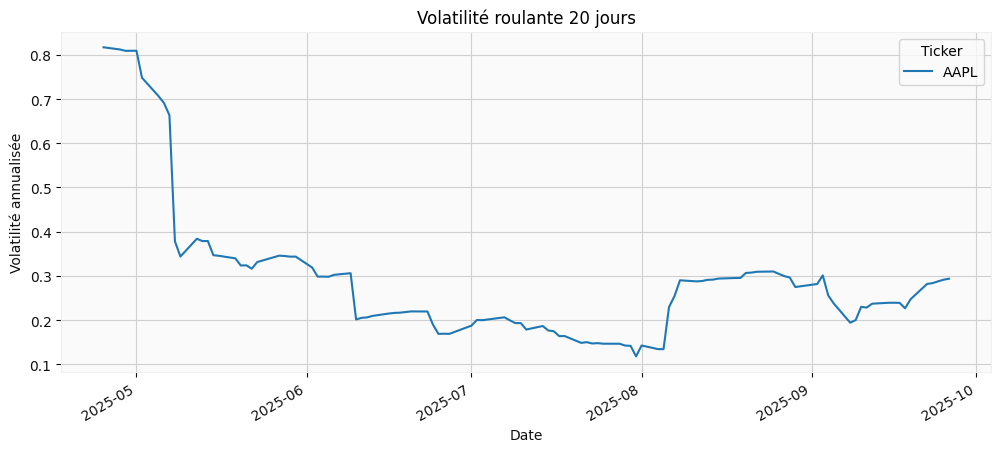

In [92]:
rolling_vol = returns.rolling(window=20).std() * np.sqrt(252)
rolling_vol.plot(figsize=(12,5))
plt.title("Volatilité roulante 20 jours")
plt.ylabel("Volatilité annualisée")
plt.grid(True)
plt.show()


## 6️-Tableau de bord d’analyse des options (facultatif)
a) Chaîne d’options

In [93]:
aapl = yf.Ticker("AAPL")
options_dates = aapl.options
opt_chain = aapl.option_chain(options_dates[0])
print(opt_chain.calls.head())


        contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0  AAPL251003C00110000 2025-09-08 14:36:26+00:00   110.0     129.72  144.70   
1  AAPL251003C00125000 2025-09-26 18:03:59+00:00   125.0     131.34  129.65   
2  AAPL251003C00135000 2025-09-26 13:56:12+00:00   135.0     121.06  119.70   
3  AAPL251003C00145000 2025-08-26 16:21:38+00:00   145.0      83.19  109.70   
4  AAPL251003C00150000 2025-09-19 19:50:00+00:00   150.0      96.05  104.75   

      ask  change  percentChange  volume  openInterest  impliedVolatility  \
0  146.10     0.0            0.0     NaN             1           3.330080   
1  131.00     0.0            0.0     3.0             0           2.791019   
2  121.10     0.0            0.0     1.0             0           2.589847   
3  111.15     0.0            0.0     NaN            10           2.361332   
4  106.35     0.0            0.0     1.0             2           1.675783   

   inTheMoney contractSize currency  
0        True      REGUL

b) Surface de volatilité implicite

On peut créer un heatmap avec strike vs days to expiration pour les options.

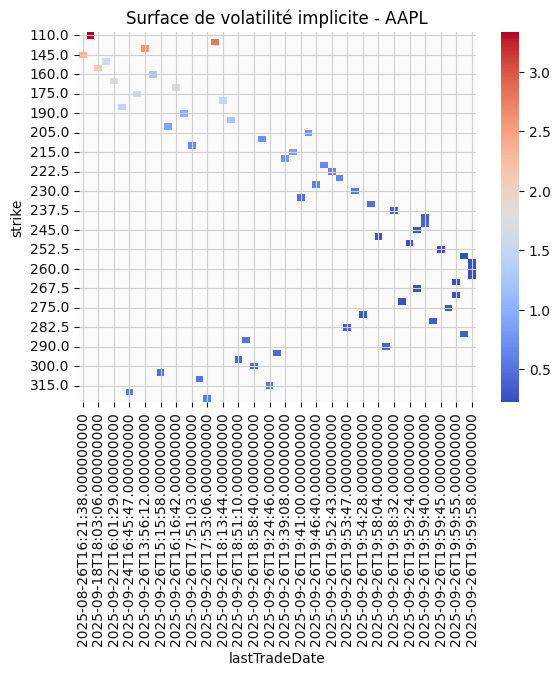

In [94]:
import seaborn as sns

calls = opt_chain.calls
sns.heatmap(calls.pivot_table(values='impliedVolatility', index='strike', columns='lastTradeDate'), cmap='coolwarm')
plt.title("Surface de volatilité implicite - AAPL")
plt.show()


c) Graphiques d’analyse des “Greeks”

Exemple : tracer Delta et Gamma en fonction du strike.